In [17]:
import diagonalizer_TI
from diagonalizer_TI import diagonalize, pSweep, spectrum_plot
import numpy as np
from copy import copy
from numpy import pi, cos, sin

SitesCount_XDefault = 400
fsysDefault = diagonalizer_TI.FinalizedSystem(SitesCount_XDefault)

#The parameters are taken from the Qi-Zhang RevModPhys for Bi2Se3
ParametersDefault = diagonalizer_TI.SimpleNamespace( A1=2.26, A2=3.33, C =-0.0083, D1 =5.74, D2 =30.4, \
                                                    M0=0.28, B1 = 6.86, B2 = 44.5,\
                                                    FermiEnergy = 0.1, \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

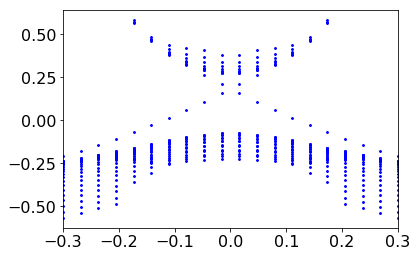

In [18]:
evals, evecs = pSweep(fsysDefault, ParametersDefault, -0.3, 0.3, 20, 'pzSweep')
spectrum_plot(evals, -0.3, 0.3, 20)